# INFINITE LOOP DURING TRAINING ON EPOCH 1, NO REAL-TIME DETECTION DUE TO THIS

This notebook was ran through google colab due to the source file originating from that environment

#Installing Packages
Link to the repo that works on TF1.x:
<br>
https://github.com/matterport/Mask_RCNN
<br>

Link to the repo that works on TF2.x:
<br>
https://github.com/ahmedfgad/Mask-RCNN-TF2

Download and extract the repository into your google drive. 
<br><br>
OR you can clone the repository and extract in inside your google VM:
<br>
!git clone https://github.com/ahmedfgad/Mask-RCNN-TF2.git


RSNA Pneumonia Detection Challenge
<br>
https://www.kaggle.com/code/hmendonca/mask-rcnn-and-coco-transfer-learning-lb-0-155/notebook
<br><br>

SIIM ACR Pneumothorax Segmentation Data
<br>
https://www.kaggle.com/code/hmendonca/mask-rcnn-and-medical-transfer-learning-siim-acr/notebook

##Mount Google Drive

In [13]:
from google.colab import drive
drive.mount("/content/gdrive/", force_remount=True)
!git clone https://github.com/ahmedfgad/Mask-RCNN-TF2.git
# Change model.py file to prevent errors with deprecated KE.Layer to KE.base_layer.Layer

Mounted at /content/gdrive/


In [2]:
%cd "/content/Mask-RCNN-TF2/"
!pip install  -r  requirements.txt
!python setup.py install

/content/Mask-RCNN-TF2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.9/28.9 MB 56.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
ERROR: Could not find a version that satisfies the requirement tensorflow==2.0.0 (from versions: 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.12.0rc0, 2.12.0rc1)
ERROR: No matching distribution found for tensorflow==2.0.0
/usr/local/lib/python3.9/dist-packages/setuptools/dist.py:697: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_fil

In [3]:
import os
if not os.path.exists("mask_rcnn_coco.h5"):
  !wget --quiet https://github.com/matterport/Mask_RCNN/releases/download/v2.0/mask_rcnn_coco.h5
  !ls -lh mask_rcnn_coco.h5

-rw-r--r-- 1 root root 246M Dec  6  2021 mask_rcnn_coco.h5


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
Instructions for updating:
Use fn_output_signature instead
/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


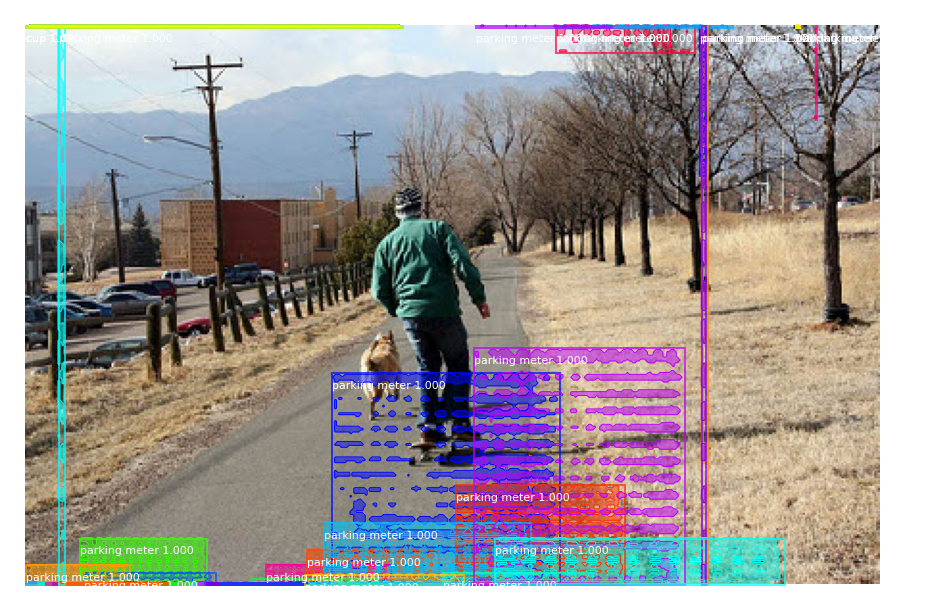

In [4]:
import mrcnn
import mrcnn.config
import mrcnn.model
import mrcnn.visualize
import cv2
import os
from google.colab.patches import cv2_imshow

# load the class label names from disk, one label per line
# CLASS_NAMES = open("coco_labels.txt").read().strip().split("\n")

CLASS_NAMES = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']

class SimpleConfig(mrcnn.config.Config):
    # Give the configuration a recognizable name
    NAME = "coco_inference"
    
    # set the number of GPUs to use along with the number of images per GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

	# Number of classes = number of classes + 1 (+1 for the background). The background class is named BG
    NUM_CLASSES = len(CLASS_NAMES)

# Initialize the Mask R-CNN model for inference and then load the weights.
# This step builds the Keras model architecture.
model = mrcnn.model.MaskRCNN(mode="inference", 
                             config=SimpleConfig(),
                             model_dir=os.getcwd())

# Load the weights into the model.
# Download the mask_rcnn_coco.h5 file from this link: https://github.com/matterport/Mask_RCNN/releases/download/v2.0/mask_rcnn_coco.h5
model.load_weights(filepath="mask_rcnn_coco.h5", 
                   by_name=True)

# load the input image, convert it from BGR to RGB channel
image = cv2.imread("test.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Perform a forward pass of the network to obtain the results
r = model.detect([image], verbose=0)

# Get the results for the first image.
r = r[0]

# Visualize the detected objects.
mrcnn.visualize.display_instances(image=image, 
                                  boxes=r['rois'], 
                                  masks=r['masks'], 
                                  class_ids=r['class_ids'], 
                                  class_names=CLASS_NAMES, 
                                  scores=r['scores'])

#Custom Dataset

In [14]:
DATASET_DIR='/content/gdrive/My Drive/bdd100k_small_pascalVOC/'
%cd "/content/gdrive/My Drive/bdd100k_small_pascalVOC/"

/content/gdrive/My Drive/bdd100k_small_pascalVOC


In [25]:
# https://youtu.be/MF2AYo0SO6s
"""
Data set from: https://www.kaggle.com/datasets/mbkinaci/fruit-images-for-object-detection
XML data in PascalVOC format
XML annotation file for each image
"""


# split into train and test set
from os import listdir
from xml.etree import ElementTree
from numpy import zeros
from numpy import asarray
from mrcnn.utils import Dataset
from matplotlib import pyplot
from mrcnn.visualize import display_instances
from mrcnn.utils import extract_bboxes

from mrcnn.config import Config
from mrcnn.model import MaskRCNN
#import re

# class that defines and loads the driving dataset
class BDD100K_small(Dataset):
    # load the dataset definitions
    def load_dataset(self, dataset_dir, is_train=True):
        # define classes
        self.add_class("dataset", 1, "pedestrian")
        self.add_class("dataset", 2, "rider")
        self.add_class("dataset", 3, "car")
        self.add_class("dataset", 4, "truck")
        self.add_class("dataset", 5, "bus")
        self.add_class("dataset", 6, "train")
        self.add_class("dataset", 7, "motorcycle")
        self.add_class("dataset", 8, "bicycle")
        self.add_class("dataset", 9, "traffic light")
        self.add_class("dataset", 10, "traffic sign")
        
        # define data locations
        images_dir = dataset_dir + '/images/'
        annotations_dir = dataset_dir + '/annots/'
       
             
		    # find all images
        for filename in listdir(images_dir):
			      # extract image id
            image_id = filename[:-4]
            img_path = images_dir + filename
            ann_path = annotations_dir + image_id + '.xml'
			      # add to dataset
            self.add_image('dataset', image_id=image_id, path=img_path, annotation=ann_path, class_ids = [1,2,3,4,5,6,7,8,9,10])


	# extract bounding boxes from an annotation file
    def extract_boxes(self, filename):
		# load and parse the file
        tree = ElementTree.parse(filename)
		# get the root of the document
        root = tree.getroot()
		# extract each bounding box
        boxes = list()
        for box in root.findall('.//object'):
            name = box.find('name').text   #Add label name to the box list
            xmin = int(box.find('./bndbox/xmin').text)
            ymin = int(box.find('./bndbox/ymin').text)
            xmax = int(box.find('./bndbox/xmax').text)
            ymax = int(box.find('./bndbox/ymax').text)
            coors = [xmin, ymin, xmax, ymax, name]
            boxes.append(coors)
		# extract image dimensions
        width = int(root.find('.//size/width').text)
        height = int(root.find('.//size/height').text)
        return boxes, width, height

	# load the masks for an image
    def load_mask(self, image_id):
		# get details of image
        info = self.image_info[image_id]
		# define box file location
        path = info['annotation']
        #return info, path
        
        
		# load XML
        boxes, w, h = self.extract_boxes(path)
		# create one array for all masks, each on a different channel
        masks = zeros([h, w, len(boxes)], dtype='uint8')
		# create masks
        class_ids = list()
        for i in range(len(boxes)):
            box = boxes[i]
            row_s, row_e = box[1], box[3]
            col_s, col_e = box[0], box[2]
            
            
            # box[4] will have the name of the class 
            if (box[4] == 'pedestrian'):
                masks[row_s:row_e, col_s:col_e, i] = 1
                class_ids.append(self.class_names.index('pedestrian'))
            elif(box[4] == 'rider'):
                masks[row_s:row_e, col_s:col_e, i] = 2
                class_ids.append(self.class_names.index('rider')) 
            elif(box[4] == 'car'):
                masks[row_s:row_e, col_s:col_e, i] = 3
                class_ids.append(self.class_names.index('car'))
            elif(box[4] == 'truck'):
                masks[row_s:row_e, col_s:col_e, i] = 4
                class_ids.append(self.class_names.index('truck')) 
            elif(box[4] == 'bus'):
                masks[row_s:row_e, col_s:col_e, i] = 5
                class_ids.append(self.class_names.index('bus'))
            elif(box[4] == 'train'):
                masks[row_s:row_e, col_s:col_e, i] = 6
                class_ids.append(self.class_names.index('train')) 
            elif(box[4] == 'motorcycle'):
                masks[row_s:row_e, col_s:col_e, i] = 7
                class_ids.append(self.class_names.index('motorcycle'))
            elif(box[4] == 'bicycle'):
                masks[row_s:row_e, col_s:col_e, i] = 8
                class_ids.append(self.class_names.index('bicycle')) 
            elif(box[4] == 'traffic light'):
                masks[row_s:row_e, col_s:col_e, i] = 9
                class_ids.append(self.class_names.index('traffic light'))
            elif(box[4] == 'traffic sign'):
                masks[row_s:row_e, col_s:col_e, i] = 10
                class_ids.append(self.class_names.index('traffic sign'))
          
        return masks, asarray(class_ids, dtype='int32')
        

	# load an image reference
    def image_reference(self, image_id):
        info = self.image_info[image_id]
        return info['path']



##Dataset

In [26]:
# train set
train_set = BDD100K_small()
train_set.load_dataset(DATASET_DIR+"/train/", is_train=True)
train_set.prepare()
print('Train: %d' % len(train_set.image_ids))

# test/val set
test_set = BDD100K_small()
test_set.load_dataset(DATASET_DIR+"/valid/", is_train=False)
test_set.prepare()
print('Test: %d' % len(test_set.image_ids))


import random
num=random.randint(0, len(train_set.image_ids))
# define image id
image_id = num
# load the image
image = train_set.load_image(image_id)
# load the masks and the class ids
mask, class_ids = train_set.load_mask(image_id)
# extract bounding boxes from the masks
bbox = extract_bboxes(mask)
# display image with masks and bounding boxes
display_instances(image, bbox, mask, class_ids, train_set.class_names)


Train: 104
Test: 104


AssertionError: ignored

##Model Config

In [33]:
# define a configuration for the model
class BDD100K_Config(Config):
  # define the name of the configuration
  NAME = "BDD100K_cfg"
  # number of classes (10 classes in driving dataset)
  NUM_CLASSES = 10
  # number of training steps per epoch
  STEPS_PER_EPOCH = 10
  VALIDATION_STEPS = 5
  STEPS_PER_EPOCH = 10
  BACKBONE = "resnet50"
  IMAGE_MAX_DIM = 640
  IMAGE_MIN_DIM = 640

# prepare config
config = BDD100K_Config()
config.display()


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 2
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  640
IMAGE_META_SIZE                22
IMAGE_MIN_DIM                  640
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [640 640   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE              

#Training

In [31]:
# Issues with training getting stuck at epoch 1, downgraded keras
!pip uninstall keras
!pip install keras==2.1

Found existing installation: keras 2.11.0
Uninstalling keras-2.11.0:
  Would remove:
    /usr/local/lib/python3.9/dist-packages/keras-2.11.0.dist-info/*
    /usr/local/lib/python3.9/dist-packages/keras/*
Proceed (Y/n)? y
  Successfully uninstalled keras-2.11.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.3/302.3 KB 25.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.11.0 requires keras<2.12,>=2.11.0, but you have keras 2.1.0 which is incompatible.


In [34]:
import os
ROOT_DIR = os.path.abspath("./")
# Directory to save logs and trained model
DEFAULT_LOGS_DIR = os.path.join(ROOT_DIR, "logs")

###############

# define the model
model = MaskRCNN(mode='training', model_dir="logs", config=config)
# load weights (mscoco) and exclude the output layers
model.load_weights("/content/Mask-RCNN-TF2/mask_rcnn_coco.h5", by_name=True, exclude=["mrcnn_class_logits", "mrcnn_bbox_fc",  "mrcnn_bbox", "mrcnn_mask"])


# train weights (output layers or 'heads')
model.train(train_set, test_set, learning_rate=config.LEARNING_RATE, epochs=5, layers='heads')

model_path = '/content/mask_rcnn_bdd100k.h5'
model.keras_model.save_weights(model_path)


Starting at epoch 0. LR=0.001

Checkpoint Path: logs/bdd100k_cfg20230313T0113/mask_rcnn_bdd100k_cfg_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
rpn_model              (Functional)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4         (TimeDistributed)
mrcnn_bbox_fc          (TimeDistributed)
mrcnn_mask_deconv      (TimeDistr

KeyboardInterrupt: ignored

**UNABLE TO TRAIN MODEL, COULDN"T FIGURE OUT HOW TO DIAGNOSE STUCK AT EPOCH 1**

#Inference

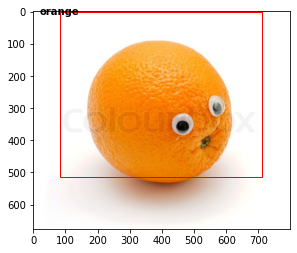

In [ ]:
from matplotlib.patches import Rectangle


# define the prediction configuration
class PredictionConfig(Config):
	# define the name of the configuration
  NAME = "fruits_cfg"
  # number of classes (background + 3 fruits)
  NUM_CLASSES = 1 + 3
  # simplify GPU config
  GPU_COUNT = 1
  IMAGES_PER_GPU = 1
  BACKBONE = "resnet50"
  IMAGE_MAX_DIM = 256
  IMAGE_MIN_DIM = 256
 


# create config
cfg = PredictionConfig()
# define the model
model = MaskRCNN(mode='inference', model_dir='logs', config=cfg)
# load model weights
model.load_weights('weights/mask_rcnn_fruits.h5', by_name=True)


#Test on a few images
import skimage
#Test on a single image

#fruit_img = skimage.io.imread("datasets/renamed_to_numbers/images/184.jpg") #Try 028, 120, 222, 171

#Download a new image for testing...
#https://c2.peakpx.com/wallpaper/603/971/645/fruit-fruit-bowl-fruits-apple-wallpaper-preview.jpg
fruit_img = skimage.io.imread("test/images/orange_91.jpg")
detected = model.detect([fruit_img])[0] 


pyplot.imshow(fruit_img)
ax = pyplot.gca()
class_names = ['apple', 'banana', 'orange']
class_id_counter=1
for box in detected['rois']:
    #print(box)
#get coordinates
    detected_class_id = detected['class_ids'][class_id_counter-1]
    #print(detected_class_id)
    #print("Detected class is :", class_names[detected_class_id-1])
    y1, x1, y2, x2 = box
    #calculate width and height of the box
    width, height = x2 - x1, y2 - y1
    #create the shape
    ax.annotate(class_names[detected_class_id-1], (x1, y1), color='black', weight='bold', fontsize=10, ha='center', va='center')
    rect = Rectangle((x1, y1), width, height, fill=False, color='red')
#draw the box
    ax.add_patch(rect)
    class_id_counter+=1
#show the figure
pyplot.show()

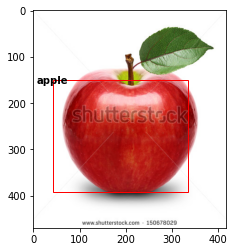

In [ ]:
fruit_img = skimage.io.imread("test/images/apple_82.jpg")
detected = model.detect([fruit_img])[0] 


pyplot.imshow(fruit_img)
ax = pyplot.gca()
class_names = ['apple', 'banana', 'orange']
class_id_counter=1
for box in detected['rois']:
    #print(box)
#get coordinates
    detected_class_id = detected['class_ids'][class_id_counter-1]
    #print(detected_class_id)
    #print("Detected class is :", class_names[detected_class_id-1])
    y1, x1, y2, x2 = box
    #calculate width and height of the box
    width, height = x2 - x1, y2 - y1
    #create the shape
    ax.annotate(class_names[detected_class_id-1], (x1, y1), color='black', weight='bold', fontsize=10, ha='center', va='center')
    rect = Rectangle((x1, y1), width, height, fill=False, color='red')
#draw the box
    ax.add_patch(rect)
    class_id_counter+=1
#show the figure
pyplot.show()

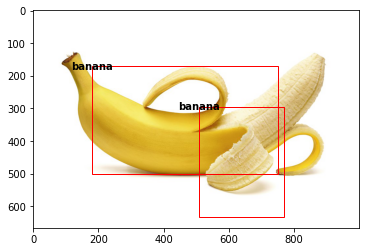

In [ ]:
fruit_img = skimage.io.imread("test/images/banana_82.jpg")
detected = model.detect([fruit_img])[0] 


pyplot.imshow(fruit_img)
ax = pyplot.gca()
class_names = ['apple', 'banana', 'orange']
class_id_counter=1
for box in detected['rois']:
    #print(box)
#get coordinates
    detected_class_id = detected['class_ids'][class_id_counter-1]
    #print(detected_class_id)
    #print("Detected class is :", class_names[detected_class_id-1])
    y1, x1, y2, x2 = box
    #calculate width and height of the box
    width, height = x2 - x1, y2 - y1
    #create the shape
    ax.annotate(class_names[detected_class_id-1], (x1, y1), color='black', weight='bold', fontsize=10, ha='center', va='center')
    rect = Rectangle((x1, y1), width, height, fill=False, color='red')
#draw the box
    ax.add_patch(rect)
    class_id_counter+=1
#show the figure
pyplot.show()